<a href="https://colab.research.google.com/github/Guilherme-dL/EconoFinPyR/blob/main/An%C3%A1lise_Macro%3A%20IPCA%2CN%C3%BAcleos%2CImpl%C3%ADcita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import datetime as dt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,5)
sns.set()

In [3]:
# Função para obter dados do API do BCB

def bc_getdata(codigo):
  link = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
  df = pd.read_json(link)
  df['data'] = pd.to_datetime(df['data'],dayfirst=True)
  df.set_index('data',drop=True,inplace=True)
  #df = df['valor']
  return df

## Documentação do SIDRA API do IBGE:
* http://api.sidra.ibge.gov.br/home/ajuda

* http://api.sidra.ibge.gov.br/

Pacote para automatizar o acesso:
* https://github.com/AlanTaranti/sidrapy

## IPCA Mensal Dessazonalizado:

In [4]:
url = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/306/p/all/c315/7169,7170,7445,7486,7558,7625,7660,7712,7766,7786/d/v306%202'

In [ ]:
#Teste = ibgesidra_getdata(7062)

In [5]:
# IPCA dessazonalizado - Variação Mensal
IPCA = pd.read_json(url)
IPCA.drop(columns={'NC','NN','D1C','D1N','D2C','D2N','D3C','MC','MN'},inplace=True)
IPCA.columns = ('Mês','Código','Nome','Valor')
IPCA.drop([0],axis=0,inplace=True)
IPCA['Valor'] = pd.to_numeric(IPCA['Valor'])

In [6]:
Mês = []
for m in range (1,10):
  for i in range(10):
    M = '2020-0{}-01'.format(m)
    Mês.append(M)
for m in range(10,13):
  for i in range(10):
    M = '2020-{}-01'.format(m)
    Mês.append(M)

In [7]:
IPCA['Mês'] = Mês
IPCA['Mês'] = pd.to_datetime( IPCA['Mês'],dayfirst=True)
#IPCA['Mês'] = IPCA['Mês'].dt.date
IPCA.set_index('Mês',drop=True,inplace=True)

In [9]:
IPCA_Grupos_Nomes = []
for i in range(1,10):
  IPCA_Grupos_Nomes.append(IPCA['Nome'][i])

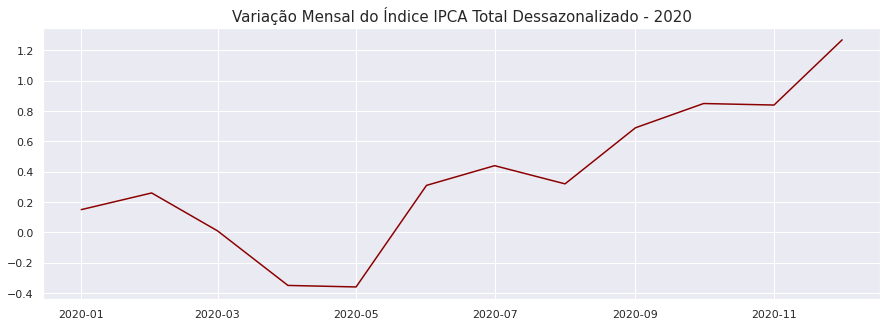

In [323]:
plt.plot(IPCA[IPCA['Nome'] == 'Índice geral']['Valor'],color='darkred')
plt.title('Variação Mensal do Índice IPCA Total Dessazonalizado - 2020',fontsize=15)
plt.show()

### Desagregando os grupos do IPCA:

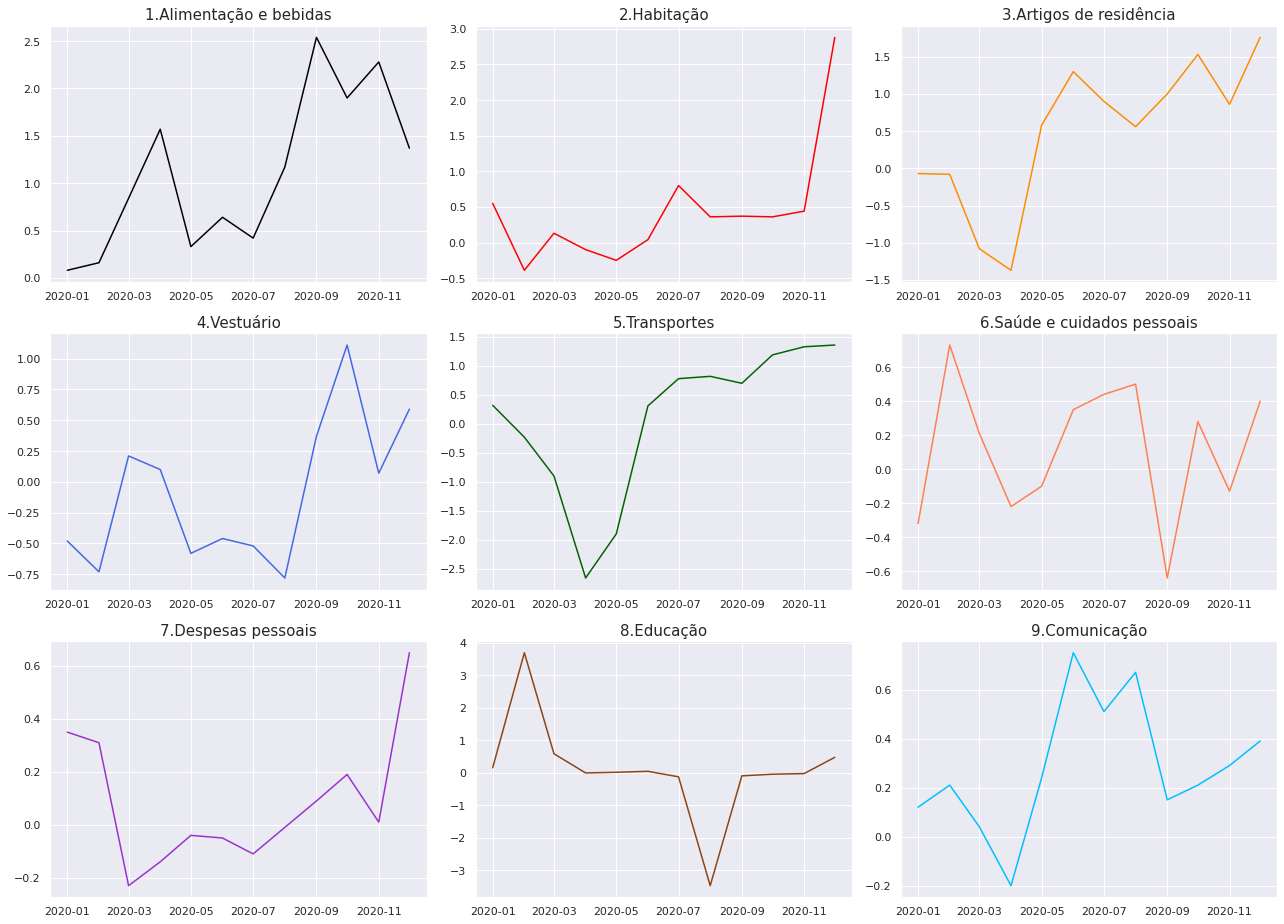

In [10]:
i = 1
f = plt.figure(figsize=(18,13))
#f.suptitle('Pesos dos grupos do IPCA', fontsize=16)
colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue']
for item in IPCA_Grupos_Nomes:
  #plt.subplots(3,3,figsize=(10,10))
  fitem = f.add_subplot(3, 3, i)
  plt.plot(IPCA[IPCA['Nome'] == item]['Valor'],color=colors[i-1]) 
  plt.title(item,fontsize=15)
  i+=1
plt.tight_layout()
plt.show()

### Grupo 1 - Alimentação:

In [349]:
url = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/306/p/all/c315/7170,7171,7172,7184,7200,7219,7241,7254,7283,7303,7335,7349,7356,7372,7384,7389,7401,7415,7432/d/v306%202'

In [350]:
IPCA_Sub1 = pd.read_json(url)
IPCA_Sub1.drop(columns={'NC','NN','D1C','D1N','D2C','D2N','D3C','MC','MN'},inplace=True)
IPCA_Sub1.columns = ('Mês','Código','Nome','Valor')
IPCA_Sub1.drop([0],axis=0,inplace=True)
IPCA_Sub1['Valor'] = pd.to_numeric(IPCA_Sub1['Valor'])

In [352]:
Mês = []
for m in range (1,10):
  for i in range(19):
    M = '2020-0{}-01'.format(m)
    Mês.append(M)
for m in range(10,13):
  for i in range(19):
    M = '2020-{}-01'.format(m)
    Mês.append(M)

In [353]:
IPCA_Sub1['Mês'] = Mês
IPCA_Sub1['Mês'] = pd.to_datetime( IPCA_Sub1['Mês'],dayfirst=True)
#IPCA_Sub1['Mês'] = IPCA_Sub1['Mês'].dt.date
IPCA_Sub1.set_index('Mês',drop=True,inplace=True)

In [ ]:
IPCA_Sub1

In [359]:
IPCA_Sub1_Nomes = []
for i in range(19):
  IPCA_Sub1_Nomes.append(IPCA_Sub1['Nome'][i])

In [ ]:
IPCA_Sub1_Nomes

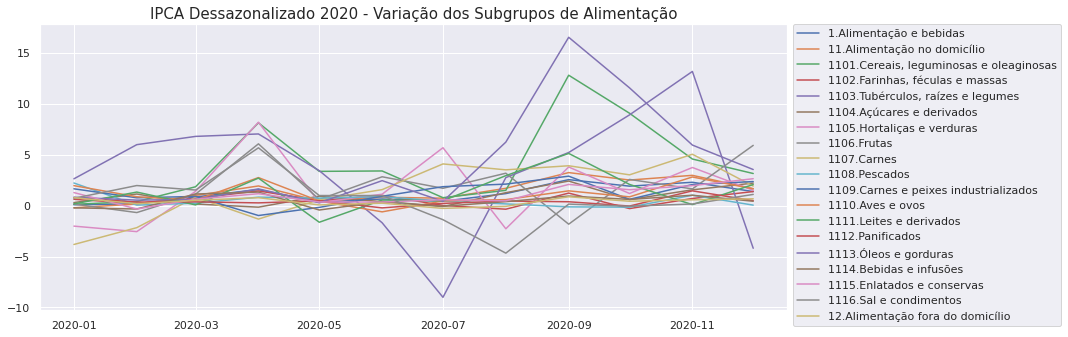

In [377]:
for item in IPCA_Sub1_Nomes:
  plt.plot(IPCA_Sub1[IPCA_Sub1['Nome'] == item]['Valor'],label=item) 
plt.legend(bbox_to_anchor=[1,1.02])
plt.title('IPCA Dessazonalizado 2020 - Variação dos Subgrupos de Alimentação',fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
for item in IPCA_Sub1_Nomes:
  print(IPCA_Sub1[IPCA_Sub1['Nome'] == item]['Valor'].sum())

In [389]:
print((IPCA_Sub1[IPCA_Sub1['Nome'] == item]['Valor'].sum()).mean())

4.66


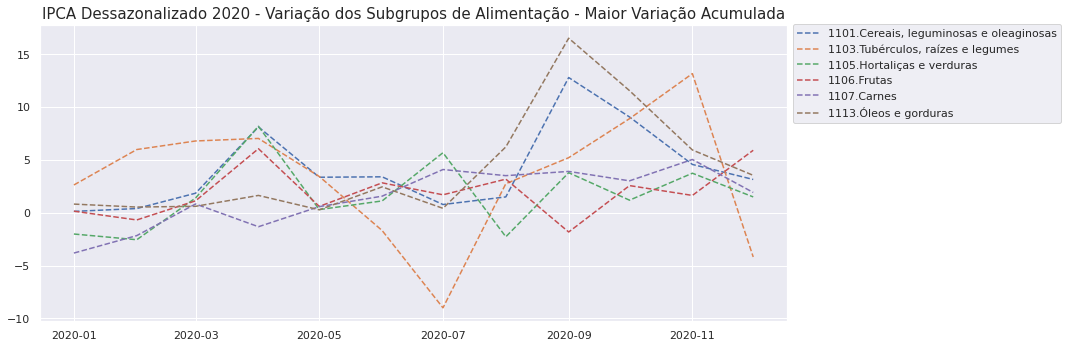

In [388]:
for item in IPCA_Sub1_Nomes:
  if IPCA_Sub1[IPCA_Sub1['Nome'] == item]['Valor'].sum() >= 17:
    plt.plot(IPCA_Sub1[IPCA_Sub1['Nome'] == item]['Valor'],ls='--',label=item) 
plt.legend(bbox_to_anchor=[1,1.02])
plt.title('IPCA Dessazonalizado 2020 - Variação dos Subgrupos de Alimentação - Maior Variação Acumulada',fontsize=15)
plt.tight_layout()
plt.show()

### Grupo 2 - Habitação:

In [398]:
url = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/306/p/all/c315/7445,7446,7447,7454,7461,7479,7480,7484/d/v306%202'

In [399]:
IPCA_Sub2 = pd.read_json(url)
IPCA_Sub2.drop(columns={'NC','NN','D1C','D1N','D2C','D2N','D3C','MC','MN'},inplace=True)
IPCA_Sub2.columns = ('Mês','Código','Nome','Valor')
IPCA_Sub2.drop([0],axis=0,inplace=True)
IPCA_Sub2['Valor'] = pd.to_numeric(IPCA_Sub2['Valor'])

In [401]:
Mês = []
for m in range (1,10):
  for i in range(8):
    M = '2020-0{}-01'.format(m)
    Mês.append(M)
for m in range(10,13):
  for i in range(8):
    M = '2020-{}-01'.format(m)
    Mês.append(M)

In [402]:
IPCA_Sub2['Mês'] = Mês
IPCA_Sub2['Mês'] = pd.to_datetime( IPCA_Sub2['Mês'],dayfirst=True)
#IPCA_Sub2['Mês'] = IPCA_Sub2['Mês'].dt.date
IPCA_Sub2.set_index('Mês',drop=True,inplace=True)

In [404]:
IPCA_Sub2_Nomes = []
for i in range(8):
  IPCA_Sub2_Nomes.append(IPCA_Sub2['Nome'][i])

In [ ]:
IPCA_Sub2

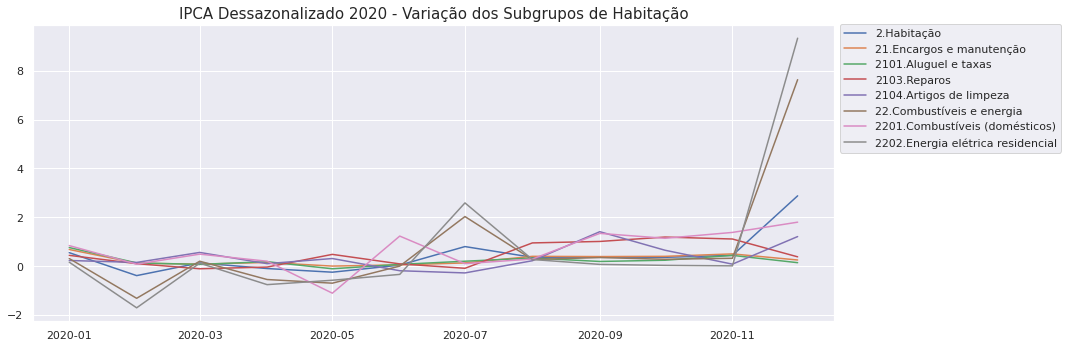

In [405]:
for item in IPCA_Sub2_Nomes:
  plt.plot(IPCA_Sub2[IPCA_Sub2['Nome'] == item]['Valor'],label=item) 
plt.legend(bbox_to_anchor=[1,1.02])
plt.title('IPCA Dessazonalizado 2020 - Variação dos Subgrupos de Habitação',fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
for item in IPCA_Sub2_Nomes:
  print(IPCA_Sub2[IPCA_Sub2['Nome'] == item]['Valor'].sum())

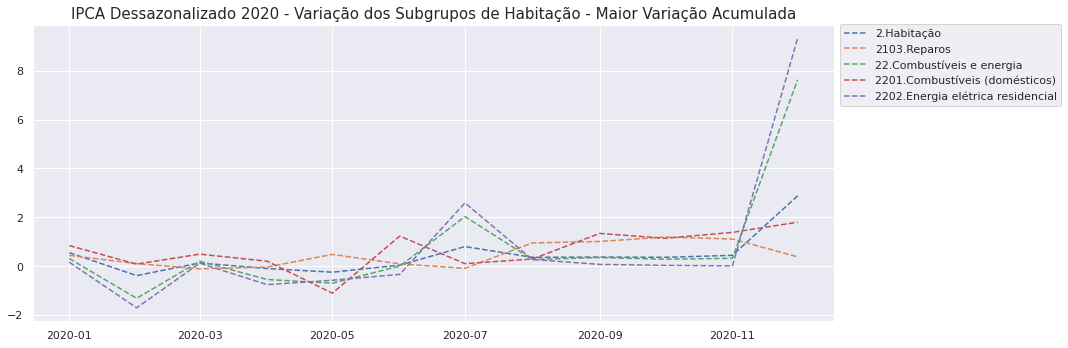

In [408]:
for item in IPCA_Sub2_Nomes:
  if IPCA_Sub2[IPCA_Sub2['Nome'] == item]['Valor'].sum() >= 5:
    plt.plot(IPCA_Sub2[IPCA_Sub2['Nome'] == item]['Valor'],ls='--',label=item) 
plt.legend(bbox_to_anchor=[1,1.02])
plt.title('IPCA Dessazonalizado 2020 - Variação dos Subgrupos de Habitação - Maior Variação Acumulada',fontsize=15)
plt.tight_layout()
plt.show()

### Grupo 5 - Transportes:

In [410]:
url = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/306/p/all/c315/7625,7626,7627,7640,7656/d/v306%202'

In [411]:
IPCA_Sub5 = pd.read_json(url)
IPCA_Sub5.drop(columns={'NC','NN','D1C','D1N','D2C','D2N','D3C','MC','MN'},inplace=True)
IPCA_Sub5.columns = ('Mês','Código','Nome','Valor')
IPCA_Sub5.drop([0],axis=0,inplace=True)
IPCA_Sub5['Valor'] = pd.to_numeric(IPCA_Sub5['Valor'])

In [414]:
Mês = []
for m in range (1,10):
  for i in range(5):
    M = '2020-0{}-01'.format(m)
    Mês.append(M)
for m in range(10,13):
  for i in range(5):
    M = '2020-{}-01'.format(m)
    Mês.append(M)

In [415]:
IPCA_Sub5['Mês'] = Mês
IPCA_Sub5['Mês'] = pd.to_datetime( IPCA_Sub5['Mês'],dayfirst=True)
#IPCA_Sub5['Mês'] = IPCA_Sub5['Mês'].dt.date
IPCA_Sub5.set_index('Mês',drop=True,inplace=True)

In [419]:
IPCA_Sub5_Nomes = []
for i in range(5):
  IPCA_Sub5_Nomes.append(IPCA_Sub5['Nome'][i])

In [420]:
IPCA_Sub5_Nomes

['5.Transportes',
 '51.Transportes',
 '5101.Transporte público',
 '5102.Veículo próprio',
 '5104.Combustíveis (veículos)']

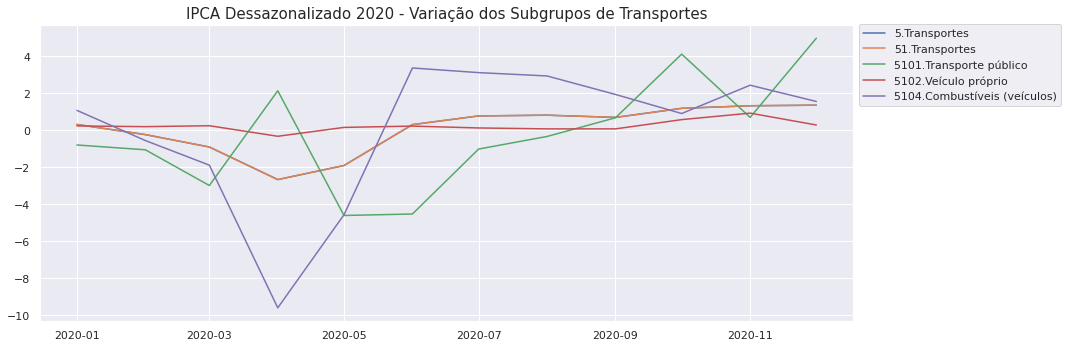

In [441]:
for item in IPCA_Sub5_Nomes:
  plt.plot(IPCA_Sub5[IPCA_Sub5['Nome'] == item]['Valor'],label=item) 
plt.legend(bbox_to_anchor=[1,1.02])
plt.title('IPCA Dessazonalizado 2020 - Variação dos Subgrupos de Transportes',fontsize=15)
plt.tight_layout()
plt.show()

### Grupo 6 - Saúde

In [422]:
url = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/306/p/all/c315/7660,7661,7662,7683,7684,7690,7695,7697,7698,109464/d/v306%202'

In [423]:
IPCA_Sub6 = pd.read_json(url)
IPCA_Sub6.drop(columns={'NC','NN','D1C','D1N','D2C','D2N','D3C','MC','MN'},inplace=True)
IPCA_Sub6.columns = ('Mês','Código','Nome','Valor')
IPCA_Sub6.drop([0],axis=0,inplace=True)
IPCA_Sub6['Valor'] = pd.to_numeric(IPCA_Sub6['Valor'])

In [425]:
Mês = []
for m in range (1,10):
  for i in range(10):
    M = '2020-0{}-01'.format(m)
    Mês.append(M)
for m in range(10,13):
  for i in range(10):
    M = '2020-{}-01'.format(m)
    Mês.append(M)

In [426]:
IPCA_Sub6['Mês'] = Mês
IPCA_Sub6['Mês'] = pd.to_datetime( IPCA_Sub6['Mês'],dayfirst=True)
#IPCA_Sub6['Mês'] = IPCA_Sub6['Mês'].dt.date
IPCA_Sub6.set_index('Mês',drop=True,inplace=True)

In [428]:
IPCA_Sub6_Nomes = []
for i in range(10):
  IPCA_Sub6_Nomes.append(IPCA_Sub6['Nome'][i])

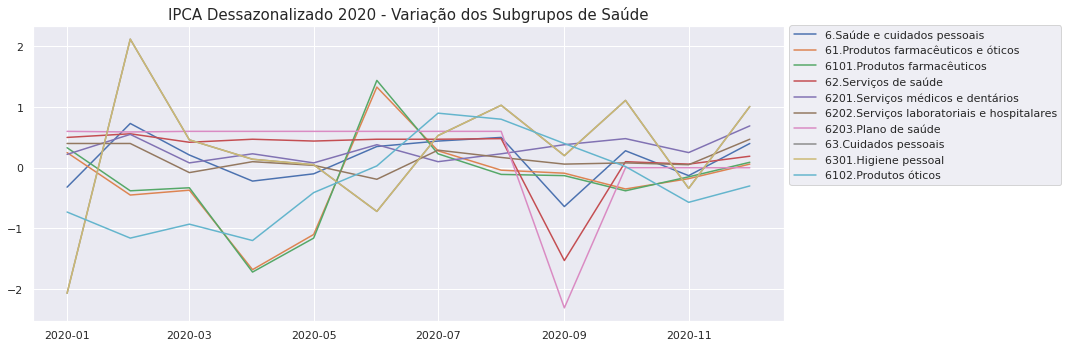

In [439]:
for item in IPCA_Sub6_Nomes:
  plt.plot(IPCA_Sub6[IPCA_Sub6['Nome'] == item]['Valor'],label=item) 
plt.legend(bbox_to_anchor=[1,1.02])
plt.title('IPCA Dessazonalizado 2020 - Variação dos Subgrupos de Saúde',fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
for item in IPCA_Sub6_Nomes:
  print(IPCA_Sub6[IPCA_Sub6['Nome'] == item]['Valor'].sum())

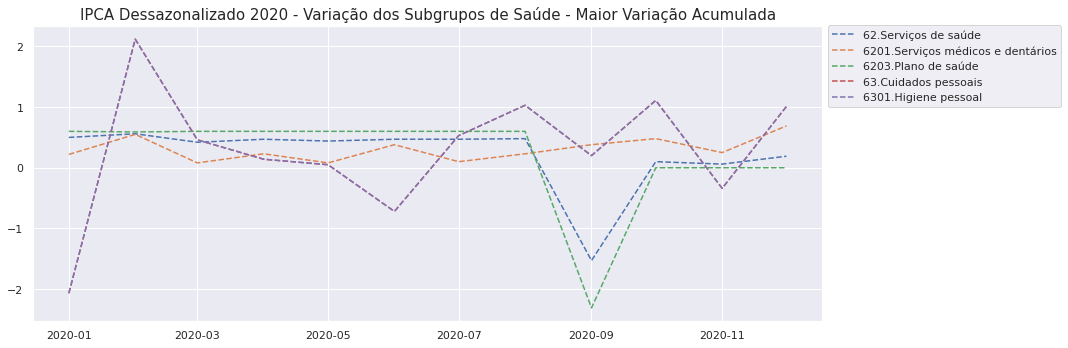

In [440]:
for item in IPCA_Sub6_Nomes:
  if IPCA_Sub6[IPCA_Sub6['Nome'] == item]['Valor'].sum() >= 2.4:
    plt.plot(IPCA_Sub6[IPCA_Sub6['Nome'] == item]['Valor'],ls='--',label=item) 
plt.legend(bbox_to_anchor=[1,1.02])
plt.title('IPCA Dessazonalizado 2020 - Variação dos Subgrupos de Saúde - Maior Variação Acumulada',fontsize=15)
plt.tight_layout()
plt.show()

## IPCA - Pesos dos Grupos:

In [ ]:
url = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/309/p/all/c315/7169,7170,7445,7486,7558,7625,7660,7712,7766,7786/d/v309%204'

In [ ]:
# IPCA_Pesos Dessazonalizado - Pesos Mensais:
IPCA_Pesos = pd.read_json(url)
IPCA_Pesos.drop(columns={'NC','NN','D1C','D1N','D2C','D2N','D3C','MC','MN'},inplace=True)
IPCA_Pesos.columns = ('Mês','Código','Nome','Valor')
IPCA_Pesos.drop([0],axis=0,inplace=True)
IPCA_Pesos['Valor'] = pd.to_numeric(IPCA_Pesos['Valor'])

In [ ]:
Mês = []
for m in range (1,10):
  for i in range(10):
    M = '2020-0{}-01'.format(m)
    Mês.append(M)
for m in range(10,13):
  for i in range(10):
    M = '2020-{}-01'.format(m)
    Mês.append(M)

In [ ]:
IPCA_Pesos['Mês'] = Mês
IPCA_Pesos['Mês'] = pd.to_datetime( IPCA_Pesos['Mês'],dayfirst=True)
#IPCA_Pesos['Mês'] = IPCA_Pesos['Mês'].dt.date
IPCA_Pesos.set_index('Mês',drop=True,inplace=True)

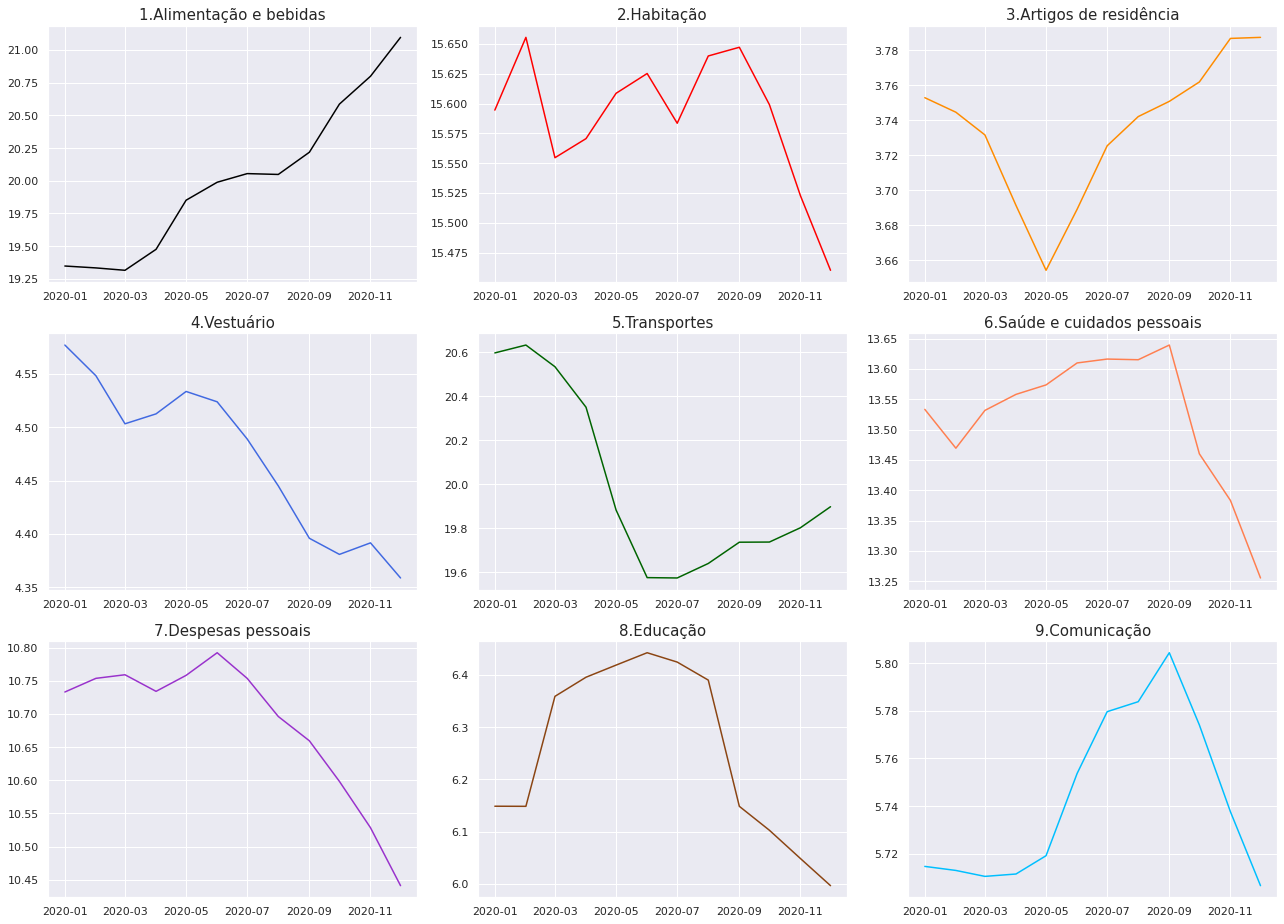

In [ ]:
i = 1
f = plt.figure(figsize=(18,13))
#f.suptitle('Pesos dos grupos do IPCA', fontsize=16)
colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue']
for item in IPCA_Grupos_Nomes:
  #plt.subplots(3,3,figsize=(10,10))
  fitem = f.add_subplot(3, 3, i)
  plt.plot(IPCA_Pesos[IPCA_Pesos['Nome'] == item]['Valor'],color=colors[i-1]) 
  plt.title(item,fontsize=15)
  i+=1
plt.tight_layout()
plt.show()

In [ ]:
PesosAcc = []
for item in IPCA_Grupos_Nomes:
  PesosAcc.append(IPCA_Pesos[IPCA_Pesos['Nome'] == item]['Valor'].sum())

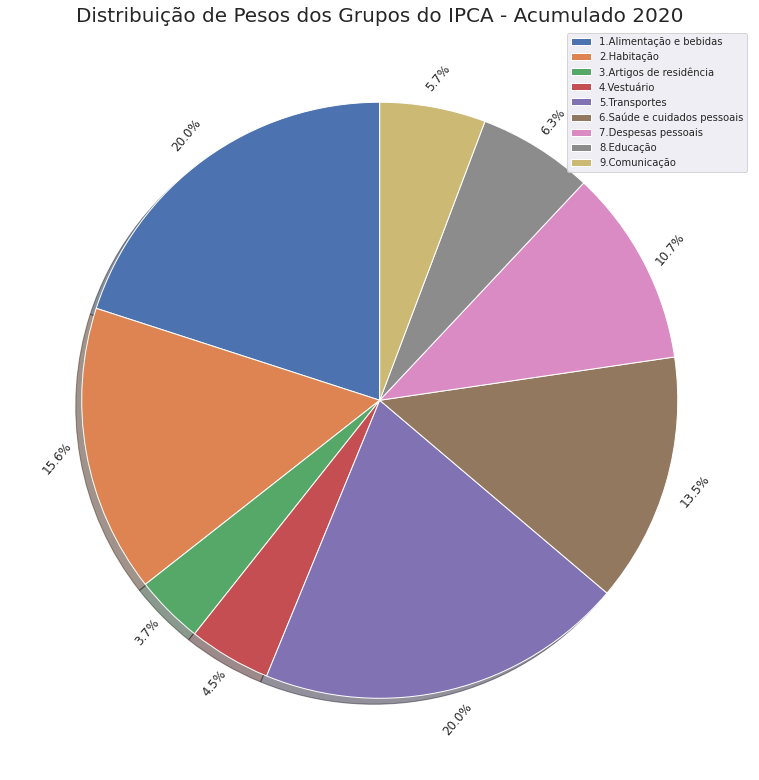

In [ ]:
plt.figure(figsize=(11,11))
plt.pie(PesosAcc,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        pctdistance=1.1,
        labeldistance=1.2,
        textprops={'rotation': 50})
plt.title('Distribuição de Pesos dos Grupos do IPCA - Acumulado 2020',fontsize=20)
plt.legend(IPCA_Grupos_Nomes,loc='upper right',fontsize=10)
plt.tight_layout()
plt.show()

## Núcleos de Inflação Bacen:

In [12]:
códigos = (4466,11426,11427,16121,16122,27838,27839)
# 4466 - Índice nacional de preços ao consumidor-Amplo (IPCA) - Núcleo médias aparadas com suavização
# 11426 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo médias aparadas sem suavização
# 11427 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX0
# 16121 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX1
# 16122 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo de dupla ponderação
# 27838 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX2
# 27839 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX3

In [36]:
for código in códigos:
  Inflação_Núcleos[código] = bc_getdata(código)['valor']
  Inflação_Núcleos = Inflação_Núcleos[Inflação_Núcleos.index >= '2010-01-01 00:00:00']
Inflação_Núcleos.drop(columns = 'valor',inplace=True)

In [38]:
Inflação_Núcleos['Média'] = round(Inflação_Núcleos.mean(axis=1),4)

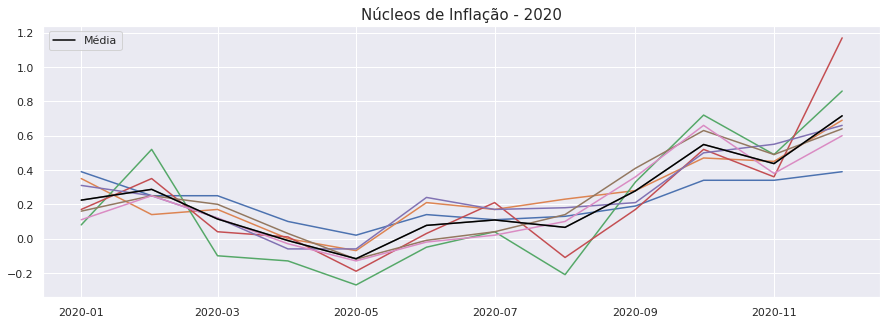

In [285]:
plt.plot(Inflação_Núcleos[Inflação_Núcleos.index >= '2020-01-01 00:00:00'])
plt.plot(Inflação_Núcleos[Inflação_Núcleos.index >= '2020-01-01 00:00:00']['Média'],color='black',label='Média')
plt.title('Núcleos de Inflação - 2020',fontsize=15)
plt.legend()
plt.show()

In [41]:
IPCA_BCB = bc_getdata(433)

In [ ]:
IPCA_BCB[IPCA_BCB.index >= '2010-01-01 00:00:00']

In [44]:
Meta_Inflação = bc_getdata(13521)

In [45]:
Meta_Inflação = Meta_Inflação[Meta_Inflação.index <= '2021-01-01 00:00:00']

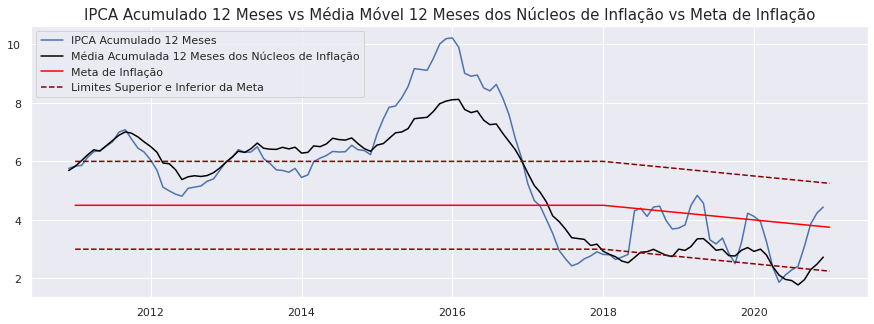

In [46]:
plt.plot(IPCA_BCB[IPCA_BCB.index >= '2010-01-01 00:00:00']['valor'].rolling(12).sum(),label='IPCA Acumulado 12 Meses')
plt.plot(Inflação_Núcleos['Média'][Inflação_Núcleos.index >= '2010-01-01 00:00:00'].rolling(12).sum(),color='black',label='Média Acumulada 12 Meses dos Núcleos de Inflação')
plt.plot(Meta_Inflação[Meta_Inflação.index >= '2011-01-01 00:00:00']['valor'],color='red',label='Meta de Inflação')
plt.plot(Meta_Inflação[Meta_Inflação.index >= '2011-01-01 00:00:00']['valor']+1.5,ls='--',color='darkred',label='Limites Superior e Inferior da Meta')
plt.plot(Meta_Inflação[Meta_Inflação.index >= '2011-01-01 00:00:00']['valor']-1.5,ls='--',color='darkred')
plt.title('IPCA Acumulado 12 Meses vs Média Móvel 12 Meses dos Núcleos de Inflação vs Meta de Inflação',fontsize=15)
plt.legend(loc='upper left')
plt.show()

## Índice de Difusão:

In [47]:
Difusão = bc_getdata(21379)

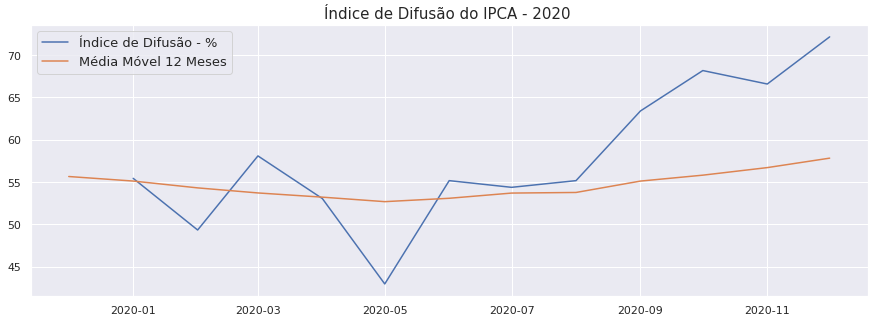

In [329]:
plt.plot(Difusão[Difusão.index >= '2020-01-01 00:00:00'],label='Índice de Difusão - %')
plt.plot(Difusão[Difusão.index >= '2019-01-01 00:00:00'].rolling(12).mean(),label='Média Móvel 12 Meses')
plt.title('Índice de Difusão do IPCA - 2020 ',fontsize=15)
plt.legend(fontsize=13)
plt.show()

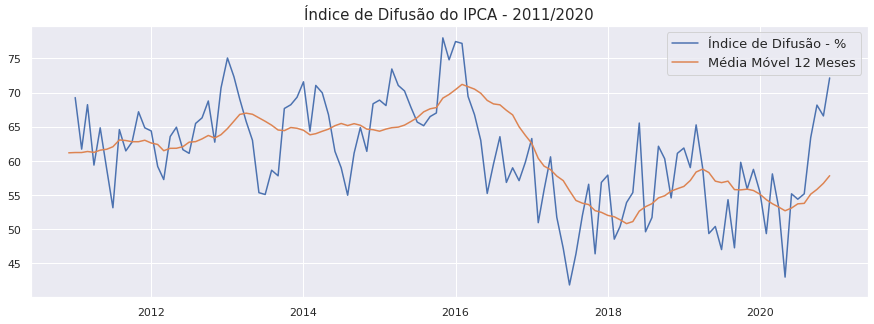

In [325]:
plt.plot(Difusão[Difusão.index >= '2011-01-01 00:00:00'],label='Índice de Difusão - %')
plt.plot(Difusão[Difusão.index >= '2010-01-01 00:00:00'].rolling(12).mean(),label='Média Móvel 12 Meses')
plt.title('Índice de Difusão do IPCA - 2011/2020',fontsize=15)
plt.legend(fontsize=13)
plt.show()

## Inflação Implícita e Curva de Juros:

In [52]:
Taxas = pd.read_csv('/content/CurvaZero_15012021.csv',sep=';',encoding='latin 1')

In [53]:
Taxas.drop(columns=['Beta 4','Lambda 1','Lambda 2'],inplace=True)
Taxas.columns = ['Vertices','ETTJ IPCA','ETTJ PREF','Inflação Implícita']

In [54]:
Taxas = Taxas[4:22]
Taxas.reset_index(drop=True,inplace=True)

In [55]:
Taxas['ETTJ IPCA'] = [i.replace(',', '.') for i in Taxas['ETTJ IPCA']]
Taxas['ETTJ PREF'] = [x.replace(',', '.') for x in Taxas['ETTJ PREF']]
Taxas['Inflação Implícita'] = [x.replace(',', '.') for x in Taxas['Inflação Implícita']]

In [ ]:
#Taxas.replace('-2.7738',-2.7738,inplace=True)
#Taxas.replace('-1.3735',-1.3735,inplace=True)

In [56]:
Taxas['ETTJ IPCA'] = Taxas['ETTJ IPCA'].astype(float)
Taxas['ETTJ PREF'] = Taxas['ETTJ PREF'].astype(float)
Taxas['Inflação Implícita'] = Taxas['Inflação Implícita'].astype(float)

In [ ]:
#Taxas['ETTJ IPCA'] = pd.to_numeric(Taxas['ETTJ IPCA'])

In [57]:
Taxas

,Vertices,ETTJ IPCA,ETTJ PREF,Inflação Implícita
0,126,-2.7618,2.3488,5.2557
1,252,-1.3312,3.5438,4.9407
2,378,0.1020,4.5833,4.4767
3,504,0.9494,5.3063,4.3159
4,630,1.4658,5.7949,4.2665
5,756,1.8108,6.1360,4.2482
6,882,2.0618,6.3876,4.2384
7,1.008,2.2575,6.5845,4.2314
8,1.134,2.4182,6.7472,4.2267
9,1.260,2.5555,6.8874,4.2239


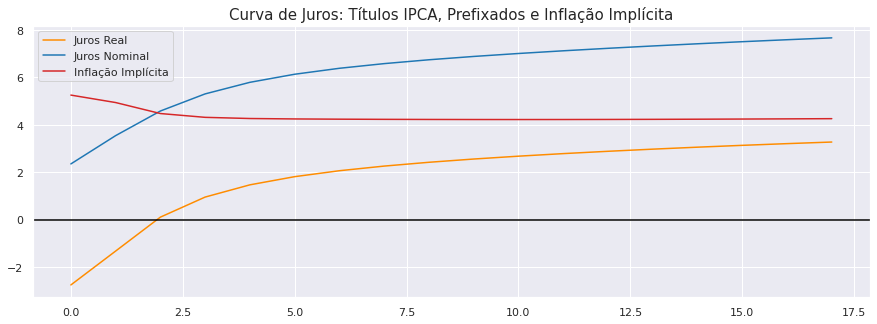

In [280]:
plt.plot(Taxas['ETTJ IPCA'],label='Juros Real',color='darkorange')
plt.plot(Taxas['ETTJ PREF'],label='Juros Nominal',color='tab:blue')
plt.plot(Taxas['Inflação Implícita'],label='Inflação Implícita',color='tab:red')
plt.title('Curva de Juros: Títulos IPCA, Prefixados e Inflação Implícita',fontsize=15)
plt.axhline(y=0,color='black')
plt.legend()
plt.show()

## Inflação por Faixas de Renda:

In [65]:
dados = 'http://www.ipea.gov.br/cartadeconjuntura/wp-content/uploads/2021/01/Infla%C3%A7%C3%A3o-por-faixa-de-renda_Tabela_blog.xlsx'

In [ ]:
#serie = http://www.ipea.gov.br/cartadeconjuntura/wp-content/uploads/2021/01/Infla%C3%A7%C3%A3o-por-faixa-de-renda_Tabela_blog.xlsx

In [66]:
IPEA_Renda = pd.read_excel(dados,skiprows=4,header=0)

In [67]:
Meses = []
for i in range(7,10):
  Meses.append('2006-0{}-01'.format(i))
for i in range(10,13):
 Meses.append('2006-{}-01'.format(i))
for i in range(7,10):
  for j in range(1,10):
    Meses.append('200{}-0{}-01'.format(i,j))
  for j in range(10,13):
    Meses.append('200{}-{}-01'.format(i,j))
for i in range(10,21):
  for j in range(1,10):
    Meses.append('20{}-0{}-01'.format(i,j))
  for j in range(10,13):
    Meses.append('20{}-{}-01'.format(i,j))

In [ ]:
Meses

In [68]:
Ipea_Renda.columns = ['Mês','Renda Muito Baixa','Renda Baixa','Renda Média Baixa','Renda Média','Renda Média Alta','Renda Alta']

In [69]:
Ipea_Renda.drop(Ipea_Renda.index[-1],inplace=True)

In [70]:
Ipea_Renda['Mês'] = Meses
Ipea_Renda['Mês'] = pd.to_datetime(Ipea_Renda['Mês'],dayfirst=True)
Ipea_Renda.set_index('Mês',drop=True,inplace=True)

In [ ]:
Ipea_Renda[Ipea_Renda.index > '2020-01-01']['Renda Baixa']

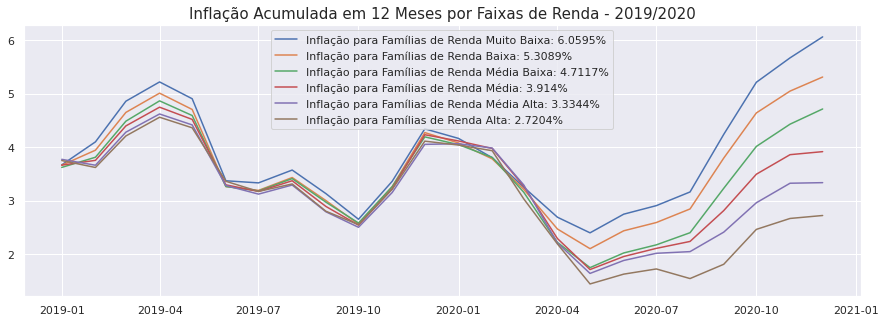

In [71]:
for grupo in Ipea_Renda.columns:
  plt.plot(Ipea_Renda[Ipea_Renda.index > '2018-01-01'][grupo].rolling(12).sum(),label='Inflação para Famílias de {}: {}%'.format(grupo,round(Ipea_Renda[Ipea_Renda.index >= '2020-01-01'][grupo].cumsum()[-1],4)))
plt.title('Inflação Acumulada em 12 Meses por Faixas de Renda - 2019/2020',fontsize=15)
plt.legend()
plt.show()

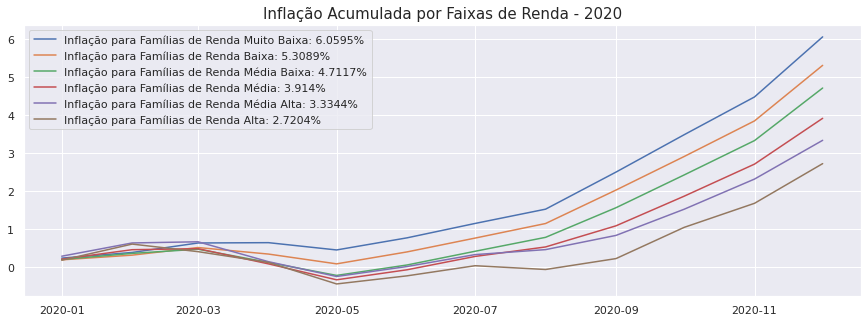

In [72]:
#plt.plot(t[t.index > '2019-01-01']['Renda Baixa'].rolling(12).sum(),label='Inflação para Famílias de Baixa Renda')
#plt.plot(t[t.index > '2019-01-01']['Renda Alta'].rolling(12).sum(),label='Inflação para Famílias de Alta Renda')
#plt.plot(t[t.index >= '2020-01-01']['Renda Muito Baixa'].cumsum(),label='Inflação para Famílias de Baixíssima Renda')
#plt.plot(t[t.index >= '2020-01-01']['Renda Alta'].cumsum(),label='Inflação para Famílias de Alta Renda')
for grupo in Ipea_Renda.columns:
  plt.plot(Ipea_Renda[Ipea_Renda.index >= '2020-01-01'][grupo].cumsum(),label='Inflação para Famílias de {}: {}%'.format(grupo,round(Ipea_Renda[Ipea_Renda.index >= '2020-01-01'][grupo].cumsum()[-1],4)))
plt.title('Inflação Acumulada por Faixas de Renda - 2020',fontsize=15)
plt.legend()
plt.show()